DSBDA PRACTICAL 4


Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset
(https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains information about various houses in Boston through
different parameters. There are 506 samples and 14 feature variables in this dataset.
The objective is to predict the value of prices of the house using the given features

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [34]:
boston = pd.read_csv("Boston (1).csv") 
df.head()

,RM,LSTAT,target
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


In [35]:
x = boston.drop(columns=["MEDV"], axis=1)
y = boston.MEDV




In [36]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [37]:
x.shape, y.shape

((506, 13), (506,))

Basic stats

In [38]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [39]:
x.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [40]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 506 entries, 0 to 505
Series name: MEDV
Non-Null Count  Dtype  
--------------  -----  
506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [41]:
y.describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [42]:
x.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [43]:
y.isnull().sum()

0

In [44]:
df = x 
df["target"] = y
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


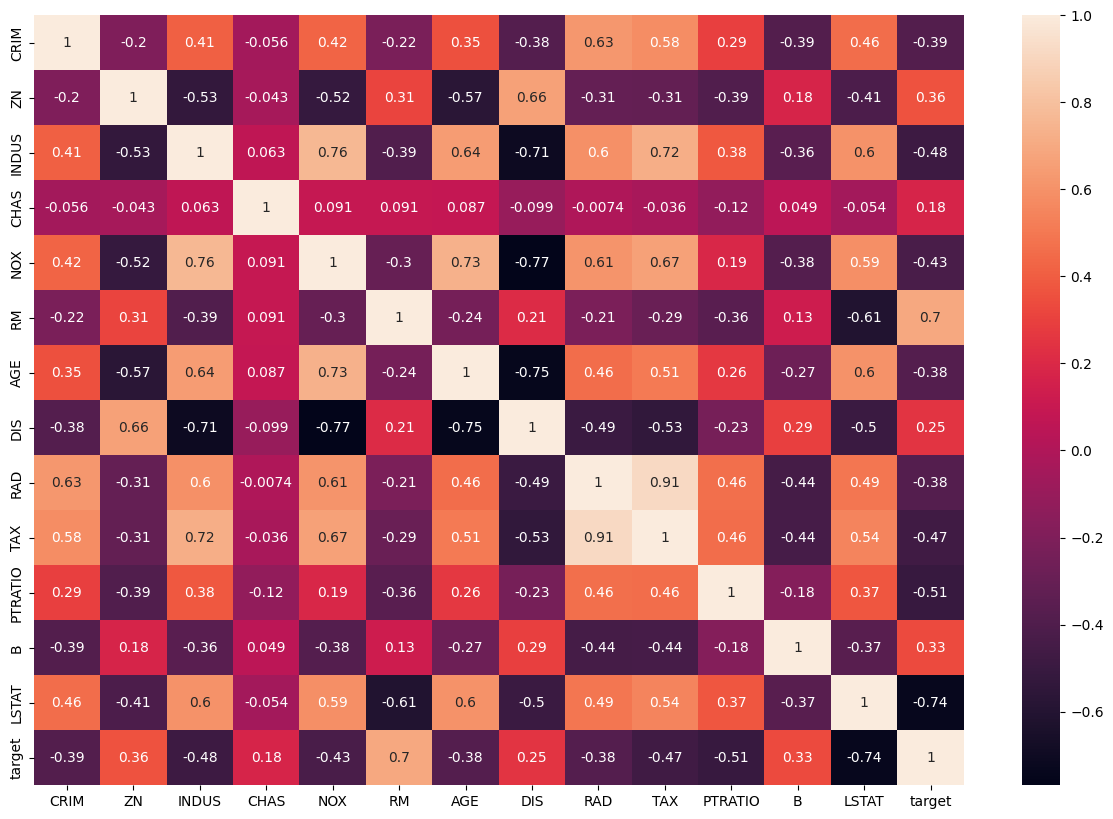

In [45]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

Considering only 'RM' and 'LSTAT' by considering correlation and multi-collinearity of other features

In [46]:
df = df[['RM', 'LSTAT', 'target']]

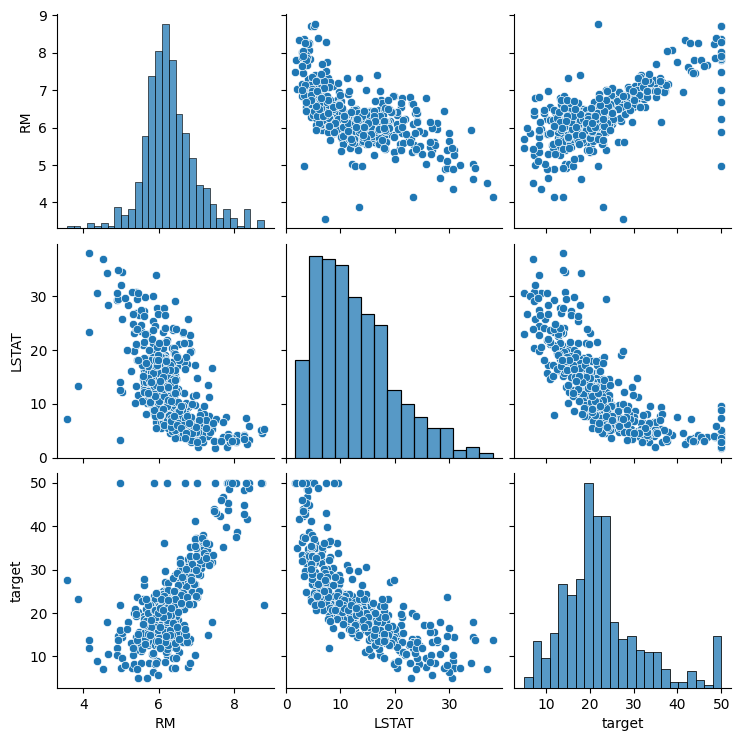

In [47]:
sns.pairplot(df)
plt.show()

In [61]:
x = df[['RM', 'LSTAT']]
y = df['target']

Scale the data

In [62]:
scaler = StandardScaler()

In [63]:
x = scaler.fit_transform(x)

Split the data

In [64]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, shuffle=True)

In [65]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((354, 2), (152, 2), (354,), (152,))

Linear Regression Modelling

In [66]:
model = LinearRegression(n_jobs=-1)

In [67]:
model.fit(x_train, y_train)

LinearRegression(n_jobs=-1)

Make predictions

In [68]:
y_pred = model.predict(x_test)

In [69]:
mean_absolute_error(y_test, y_pred)

4.213253704981635

In [70]:
mean_squared_error(y_test, y_pred)

34.64258615018261

<Axes: xlabel='target'>

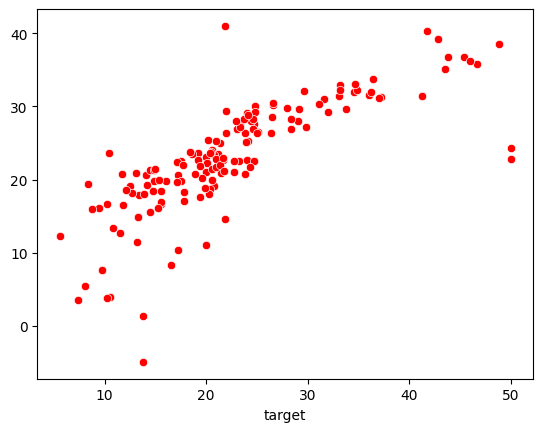

In [80]:
sns.scatterplot(x=y_test, y=y_pred, color='red')


<Axes: xlabel='target'>

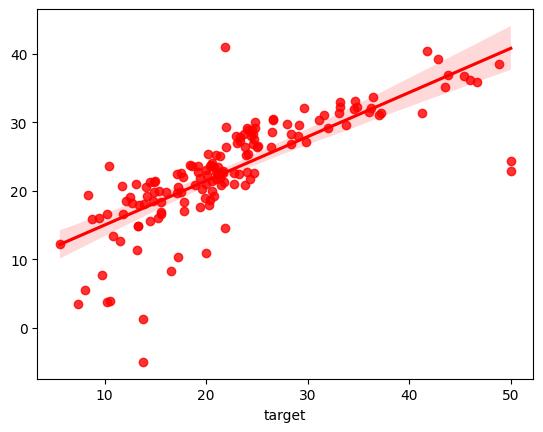

In [83]:
sns.regplot(x=y_test, y=y_pred, color='red')
